To randomly generate multiple $\text{random\_theta}$ values and compute both the MSE and the condition number of the interpolation matrix for each, we can follow these steps:

1. Generate a number of random values for $\text{random\_theta}$.
2. For each value, create a $\theta\_vals$ vector.
3. Calculate the MSE for each $\theta\_vals$.
4. Compute the condition number of the interpolation matrix for each $\theta\_vals$.

In [75]:
import numpy as np

def interp_matrix(theta_vals):
    # Create interpolation matrix
    return np.array([[1/np.sqrt(2), np.cos(val), np.sin(val)] for val in theta_vals])

def mse2(theta_vals):
    # Create interpolation matrix
    A = interp_matrix(theta_vals)
    return np.linalg.norm(np.linalg.inv(A), 'fro') ** 2

def mse(theta_vals):
    # Create interpolation matrix
    A = interp_matrix(theta_vals)
    return np.trace(np.linalg.inv(A.T @ A))

def condition_number(matrix):
    # Compute the condition number of the matrix
    return np.linalg.cond(matrix)

# Number of random tests
num_tests = 10

# Define the interval 2pi/3
interval = 2 * np.pi / 3
# interval = 3 * np.pi / 2
# Perform the tests
results = []
for _ in range(num_tests):
    # Generate a random theta value between 0 and 2pi
    random_theta = np.random.uniform(0, 2 * np.pi)

    # Create theta_vals by adding 2pi/3 and shifting within 0 to 2pi
    theta_vals = np.array([random_theta, random_theta + interval, random_theta + 2 * interval]) % (2 * np.pi)
    
    # Calculate the MSE for the generated theta_vals
    mse_value = mse(theta_vals)
    
    # Calculate the condition number of the interpolation matrix
    condition_num = condition_number(interp_matrix(theta_vals))
    
    # Store the results
    results.append((mse_value, condition_num))

# Print the results
for i, (mse_value, condition_num) in enumerate(results):
    print(f"Test {i+1}: MSE = {mse_value:.4f}, Condition Number = {condition_num:.4f}")

Test 1: MSE = 2.0000, Condition Number = 1.0000
Test 2: MSE = 2.0000, Condition Number = 1.0000
Test 3: MSE = 2.0000, Condition Number = 1.0000
Test 4: MSE = 2.0000, Condition Number = 1.0000
Test 5: MSE = 2.0000, Condition Number = 1.0000
Test 6: MSE = 2.0000, Condition Number = 1.0000
Test 7: MSE = 2.0000, Condition Number = 1.0000
Test 8: MSE = 2.0000, Condition Number = 1.0000
Test 9: MSE = 2.0000, Condition Number = 1.0000
Test 10: MSE = 2.0000, Condition Number = 1.0000


In [76]:
def vandermonde_matrix(x, column_major=False):
    """
    Generate a Vandermonde matrix for given distinct complex numbers x.
    
    Parameters:
    x (array-like): A 1D array of distinct complex numbers.
    
    Returns:
    V (numpy.ndarray): The Vandermonde matrix.
    """
    n = len(x)
    V = np.zeros((n, n), dtype=complex)
    for i in range(n):
        for j in range(n):
            V[i, j] = x[j] ** i
    return V.T if column_major else V

# Example usage
x = np.array([1, 2, 3])
V = vandermonde_matrix(x, column_major=True)
print(V)

# Define the theta values based on the given interval
random_theta = np.random.uniform(0, 2 * np.pi)
interval = 2 * np.pi / 3
theta_vals = np.array([random_theta, random_theta + interval, random_theta + 2 * interval])
x = [np.exp(1j * theta) for theta in theta_vals]

# Generate the Vandermonde matrix using the theta values
V = vandermonde_matrix(x, column_major=True)
print(V)
print(V.conj().T @ V)
print(V @ V.conj().T )
# Compute the Frobenius norm of the inverse of V and then square it
frobenius_norm_inv_V_squared = 2 * np.linalg.norm(np.linalg.inv(V), 'fro') ** 2
print(frobenius_norm_inv_V_squared)
print(mse(theta_vals))
print(mse2(theta_vals))
print(np.linalg.cond(V, 'fro'))
print(np.linalg.cond(interp_matrix(theta_vals), 'fro'))
print(np.linalg.cond(V, 2))
print(np.linalg.cond(interp_matrix(theta_vals), 2))

[[1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 2.+0.j 4.+0.j]
 [1.+0.j 3.+0.j 9.+0.j]]
[[ 1.        +0.j          0.69397353+0.72000051j -0.03680147+0.9993226j ]
 [ 1.        +0.j         -0.9705255 +0.24099845j  0.88383949-0.46779029j]
 [ 1.        +0.j          0.27655197-0.96099896j -0.84703802-0.53153231j]]
[[ 3.00000000e+00+0.00000000e+00j -7.77156117e-16-2.22044605e-16j
  -8.88178420e-16+1.11022302e-15j]
 [-7.77156117e-16+2.22044605e-16j  3.00000000e+00+0.00000000e+00j
  -8.88178420e-16-4.44089210e-16j]
 [-8.88178420e-16-1.11022302e-15j -8.88178420e-16+4.44089210e-16j
   3.00000000e+00+0.00000000e+00j]]
[[ 3.00000000e+00+0.00000000e+00j -5.55111512e-17-2.77555756e-17j
   6.66133815e-16-1.22124533e-15j]
 [-5.55111512e-17+2.77555756e-17j  3.00000000e+00+0.00000000e+00j
  -7.11236625e-16-9.43689571e-16j]
 [ 6.66133815e-16+1.22124533e-15j -7.11236625e-16+9.43689571e-16j
   3.00000000e+00+0.00000000e+00j]]
1.9999999999999996
2.0
2.0000000000000004
(2.9999999999999996+0j)
3.0
1.0
1.0000000000000004


This Python code performs an analysis of the impact of different intervals on the Mean Squared Error (MSE) and condition number of an interpolation matrix, using random angles $\theta$. It generates plots to visualize these effects.

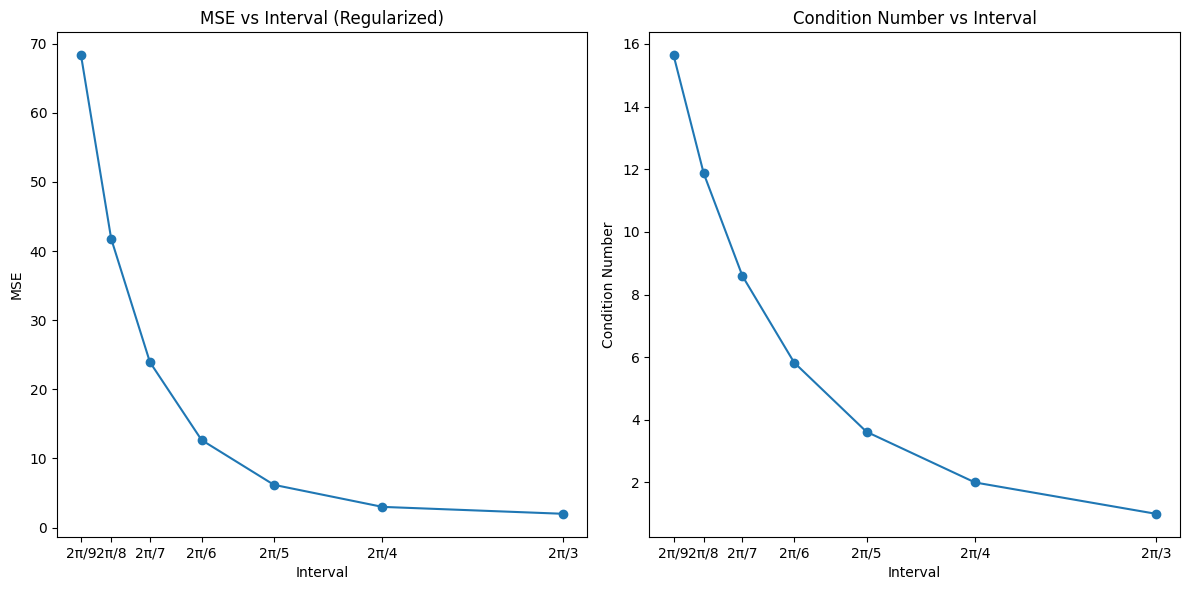

In [77]:
import numpy as np
import matplotlib.pyplot as plt


def condition_number(matrix):
    # Compute the condition number of the matrix
    return np.linalg.cond(matrix)

# Number of random tests
num_tests = 10

# Define the specific intervals to test
intervals = [2 * np.pi / n for n in range(3, 10)]

# Store results for each interval
mse_results = []
condition_results = []

# Generate a random theta value between 0 and 2pi
random_theta = np.random.uniform(0, 2 * np.pi)
random_theta = 0

# Perform the tests for each interval
for interval in intervals:
    mse_values = []
    condition_numbers = []
    for _ in range(num_tests):
        
        # Create theta_vals by adding interval and shifting within 0 to 2pi
        theta_vals = np.array([random_theta, random_theta + interval, random_theta + 2 * interval]) % (2 * np.pi)
        
        # Calculate the MSE for the generated theta_vals with regularization
        mse_value = mse(theta_vals)
        
        # Calculate the condition number of the interpolation matrix
        condition_num = condition_number(interp_matrix(theta_vals))
        
        # Store the results
        mse_values.append(mse_value)
        condition_numbers.append(condition_num)
    
    # Append the average results for this interval
    mse_results.append(np.mean(mse_values))
    condition_results.append(np.mean(condition_numbers))

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(intervals, mse_results, marker='o')
plt.title('MSE vs Interval (Regularized)')
plt.xlabel('Interval')
plt.ylabel('MSE')
plt.xticks(intervals, labels=[f"2π/{n}" for n in range(3, 10)])

plt.subplot(1, 2, 2)
plt.plot(intervals, condition_results, marker='o')
plt.title('Condition Number vs Interval')
plt.xlabel('Interval')
plt.ylabel('Condition Number')
plt.xticks(intervals, labels=[f"2π/{n}" for n in range(3, 10)])

plt.tight_layout()
plt.show()

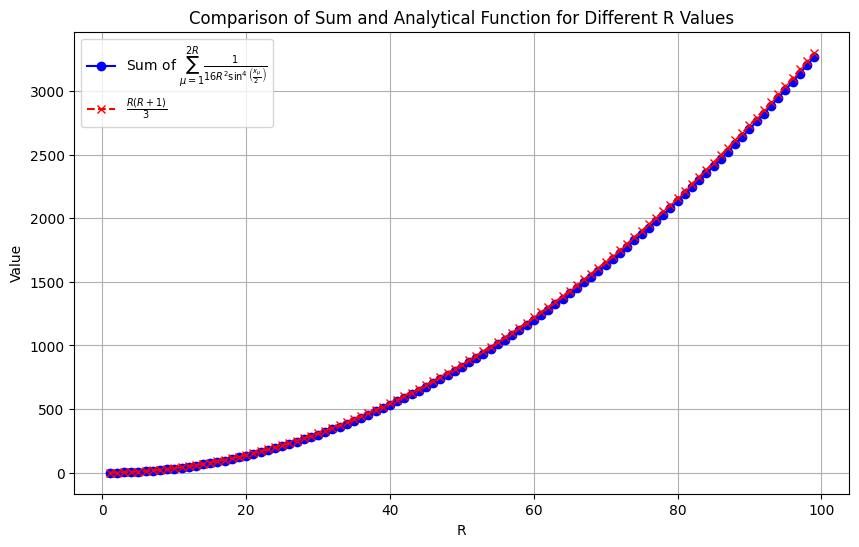

([0.4999999999999999,
  1.4999999999999991,
  3.166666666666661,
  5.499999999999982,
  8.499999999999986,
  12.166666666666597,
  16.499999999999968,
  21.4999999999999,
  27.16666666666666,
  33.49999999999989,
  40.499999999999915,
  48.1666666666666,
  56.499999999999474,
  65.49999999999972,
  75.16666666666676,
  85.50000000000017,
  96.50000000000004,
  108.16666666666632,
  120.49999999999865,
  133.50000000000068,
  147.166666666668,
  161.49999999999713,
  176.49999999999778,
  192.1666666666684,
  208.50000000000077,
  225.4999999999937,
  243.16666666666288,
  261.5000000000018,
  280.50000000000415,
  300.1666666666606,
  320.49999999999983,
  341.49999999999886,
  363.16666666667226,
  385.4999999999909,
  408.4999999999958,
  432.1666666666629,
  456.49999999999295,
  481.49999999998164,
  507.16666666666526,
  533.4999999999877,
  560.4999999999905,
  588.1666666666682,
  616.5000000000007,
  645.4999999999839,
  675.1666666666724,
  705.4999999999682,
  736.49999999999

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def compute_sum(R):
    sum_value = 0
    for mu in range(1, 2 * R + 1):
        x_mu = np.pi * (2 * mu - 1) / (2 * R)
        sum_value += 1 / (16 * R**2 * np.sin(x_mu / 2)**4)
    return sum_value

# Values of R to compute
R_values = range(1, 100)

# Compute the sum and the analytical function for each R
results_sum = []
results_analytical = []

# Calculate sum and the analytical function for each R
for R in R_values:
    sum_result = compute_sum(R)
    results_sum.append(sum_result)
    analytical_result = R * (R + 1) / 3
    results_analytical.append(analytical_result)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(R_values, results_sum, marker='o', linestyle='-', color='blue', label='Sum of $\sum_{\\mu=1}^{2 R} \\frac{1}{16 R^2 \\sin ^4\\left(\\frac{x_\\mu}{2}\\right)}$')
plt.plot(R_values, results_analytical, marker='x', linestyle='--', color='red', label='$\\frac{R(R+1)}{3}$')
plt.title('Comparison of Sum and Analytical Function for Different R Values')
plt.xlabel('R')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

results_sum, results_analytical



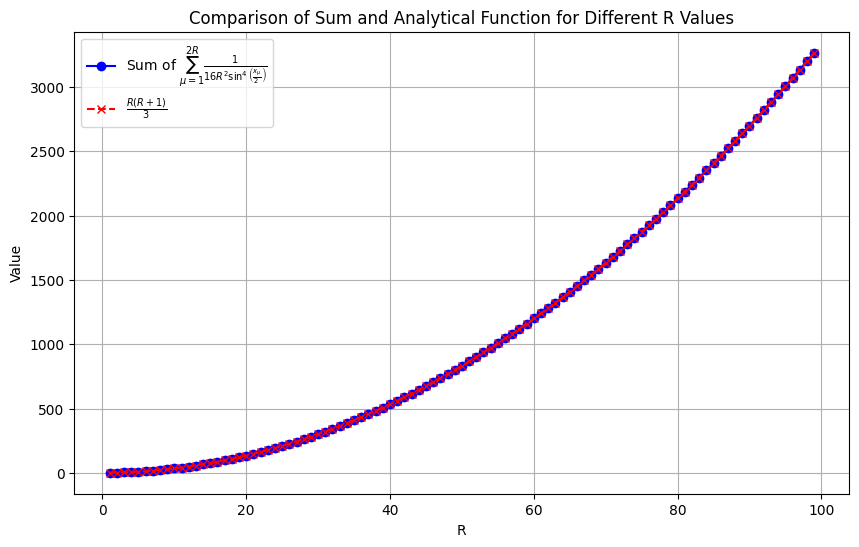

R = 1, Difference = -1.1102230246251565e-16
R = 2, Difference = -8.881784197001252e-16
R = 3, Difference = -5.329070518200751e-15
R = 4, Difference = -1.7763568394002505e-14
R = 5, Difference = -1.4210854715202004e-14
R = 6, Difference = -6.927791673660977e-14
R = 7, Difference = -3.197442310920451e-14
R = 8, Difference = -9.947598300641403e-14
R = 9, Difference = -7.105427357601002e-15
R = 10, Difference = -1.0658141036401503e-13
R = 11, Difference = -8.526512829121202e-14
R = 12, Difference = -6.394884621840902e-14
R = 13, Difference = -5.258016244624741e-13
R = 14, Difference = -2.8421709430404007e-13
R = 15, Difference = 8.526512829121202e-14
R = 16, Difference = 1.7053025658242404e-13
R = 17, Difference = 4.263256414560601e-14
R = 18, Difference = -3.552713678800501e-13
R = 19, Difference = -1.3500311979441904e-12
R = 20, Difference = 6.821210263296962e-13
R = 21, Difference = 1.3358203432289883e-12
R = 22, Difference = -2.8705926524708048e-12
R = 23, Difference = -2.2168933355715

([0.4999999999999999,
  1.4999999999999991,
  3.166666666666661,
  5.499999999999982,
  8.499999999999986,
  12.166666666666597,
  16.499999999999968,
  21.4999999999999,
  27.16666666666666,
  33.49999999999989,
  40.499999999999915,
  48.1666666666666,
  56.499999999999474,
  65.49999999999972,
  75.16666666666676,
  85.50000000000017,
  96.50000000000004,
  108.16666666666632,
  120.49999999999865,
  133.50000000000068,
  147.166666666668,
  161.49999999999713,
  176.49999999999778,
  192.1666666666684,
  208.50000000000077,
  225.4999999999937,
  243.16666666666288,
  261.5000000000018,
  280.50000000000415,
  300.1666666666606,
  320.49999999999983,
  341.49999999999886,
  363.16666666667226,
  385.4999999999909,
  408.4999999999958,
  432.1666666666629,
  456.49999999999295,
  481.49999999998164,
  507.16666666666526,
  533.4999999999877,
  560.4999999999905,
  588.1666666666682,
  616.5000000000007,
  645.4999999999839,
  675.1666666666724,
  705.4999999999682,
  736.49999999999

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def compute_sum(R):
    sum_value = 0
    for mu in range(1, 2 * R + 1):
        x_mu = np.pi * (2 * mu - 1) / (2 * R)
        sum_value += 1 / (16 * R**2 * np.sin(x_mu / 2)**4)
    return sum_value

# Values of R to compute
R_values = range(1, 100)

# Compute the sum and the analytical function for each R
results_sum = []
results_analytical = []
differences = []

# Calculate sum, the analytical function, and their differences for each R
for R in R_values:
    sum_result = compute_sum(R)
    results_sum.append(sum_result)
    # analytical_result = R * (R + 1) / 3 - (2 * R - 1)/6 
    analytical_result = (2*R**2+1 )/6
    results_analytical.append(analytical_result)
    differences.append(sum_result - analytical_result)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(R_values, results_sum, marker='o', linestyle='-', color='blue', label='Sum of $\sum_{\\mu=1}^{2 R} \\frac{1}{16 R^2 \\sin ^4\\left(\\frac{x_\\mu}{2}\\right)}$')
plt.plot(R_values, results_analytical, marker='x', linestyle='--', color='red', label='$\\frac{R(R+1)}{3}$')
plt.title('Comparison of Sum and Analytical Function for Different R Values')
plt.xlabel('R')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Print the differences
for R, diff in zip(R_values, differences):
    print(f"R = {R}, Difference = {diff}")

results_sum, results_analytical, differences
